<a href="https://colab.research.google.com/github/sy-veronica/02.-Customer-Segmentation-RFM-/blob/main/02_RFM_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 프로젝트02 : 고객 분석 (RFM Segmentation)

## 01. 데이터 전처리 과정

In [1]:
# (1) 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# (2) 데이터셋 불러오기
location = '/content/drive/MyDrive/Project/02.RFM_segmentation/US  E-commerce records 2020.csv'
df = pd.read_csv(location, encoding="ISO-8859-1")
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,01-01-20,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,01-01-20,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,01-01-20,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,01-01-20,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,01-01-20,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [5]:
# (3) 데이터셋 확인하기
print('Data Frame Shape : ', df.shape)
df.info()   # 결측치 없음

Data Frame Shape :  (3312, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order Date    3312 non-null   object 
 1   Row ID        3312 non-null   int64  
 2   Order ID      3312 non-null   object 
 3   Ship Mode     3312 non-null   object 
 4   Customer ID   3312 non-null   object 
 5   Segment       3312 non-null   object 
 6   Country       3312 non-null   object 
 7   City          3312 non-null   object 
 8   State         3312 non-null   object 
 9   Postal Code   3312 non-null   int64  
 10  Region        3312 non-null   object 
 11  Product ID    3312 non-null   object 
 12  Category      3312 non-null   object 
 13  Sub-Category  3312 non-null   object 
 14  Product Name  3312 non-null   object 
 15  Sales         3312 non-null   float64
 16  Quantity      3312 non-null   int64  
 17  Discount      3312 non-null   float64
 1

In [6]:
# (4) 데이터셋 수정하기
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y').dt.strftime('%Y-%m-%d')   # 날짜형식 변경

In [7]:
df.head()

,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,44052,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568
1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,90036,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606
2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280
3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580
4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,77340,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815


In [ ]:
# (5-1) 파일 저장
df.to_csv('/content/drive/MyDrive/Project/02.RFM_segmentation/US_e_commerce_records_2020(rev00).csv')

## 02. EDA

In [8]:
# 기간 : 1년 (2020-01-01 ~ 2020-12-30)
df['Order Date'].min(), df['Order Date'].max()

('2020-01-01', '2020-12-30')

In [9]:
# 위치
#df['Country'].value_counts()   # United States 3312
#df['Region'].value_counts()    # West 1095 / East 921 / Central 778 / South 518
# df['State'].nunique()         # 47개 주
# df['City'].nunique()          # 350개 도시

In [10]:
# 고객 수 : 693명
df['Customer ID'].nunique()

693

In [11]:
# 고객별 주문횟수
df.groupby('Customer ID')['Order ID'].nunique()

Customer ID
AA-10315    1
AA-10375    2
AA-10480    1
AA-10645    1
AB-10060    4
           ..
XP-21865    4
YC-21895    1
YS-21880    5
ZC-21910    4
ZD-21925    1
Name: Order ID, Length: 693, dtype: int64

In [22]:
table1 = df.groupby('Customer ID')['Order ID'].nunique().value_counts().reset_index()
table1

,index,Order ID
0,1,200
1,2,200
2,3,156
3,4,85
4,5,39
5,6,9
6,7,2
7,8,2


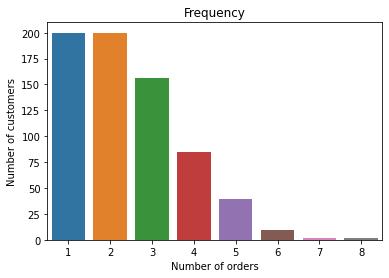

In [27]:
sns.barplot(data = table1,
            x = 'index',
            y = 'Order ID')

plt.title('Frequency')
plt.xlabel('Number of orders')
plt.ylabel('Number of customers')
plt.show()

In [12]:
# 고객별 최종방문일
df.groupby('Customer ID')['Order Date'].max()

Customer ID
AA-10315    2020-06-29
AA-10375    2020-12-11
AA-10480    2020-04-15
AA-10645    2020-11-05
AB-10060    2020-11-06
               ...    
XP-21865    2020-11-17
YC-21895    2020-12-26
YS-21880    2020-12-21
ZC-21910    2020-11-06
ZD-21925    2020-06-11
Name: Order Date, Length: 693, dtype: object

In [34]:
table2 = df.groupby('Customer ID')['Order Date'].max().value_counts().sort_index().reset_index()
table2

,index,Order Date
0,2020-01-02,1
1,2020-01-06,1
2,2020-01-07,1
3,2020-01-12,1
4,2020-01-14,1
...,...,...
214,2020-12-26,4
215,2020-12-27,1
216,2020-12-28,10
217,2020-12-29,6


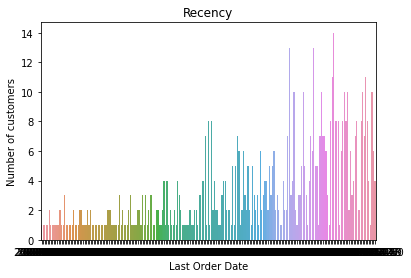

In [40]:
sns.barplot(data = table2,
            x = 'index',
            y = 'Order Date')

plt.title('Recency')
plt.xlabel('Last Order Date')
plt.ylabel('Number of customers')
plt.show()

In [13]:
# 고객별 구매금액
df.groupby('Customer ID')['Sales'].sum()

Customer ID
AA-10315     374.480
AA-10375     206.732
AA-10480      15.552
AA-10645      12.960
AB-10060    2936.264
              ...   
XP-21865     449.312
YC-21895     750.680
YS-21880    5340.264
ZC-21910     227.066
ZD-21925      61.440
Name: Sales, Length: 693, dtype: float64

In [44]:
table3 = df.groupby('Customer ID')['Sales'].sum().reset_index()
table3

,Customer ID,Sales
0,AA-10315,374.480
1,AA-10375,206.732
2,AA-10480,15.552
3,AA-10645,12.960
4,AB-10060,2936.264
...,...,...
688,XP-21865,449.312
689,YC-21895,750.680
690,YS-21880,5340.264
691,ZC-21910,227.066


In [47]:
table3['Sales'].describe()

count      693.000000
mean      1058.030671
std       1463.910713
min          1.188000
25%        204.405000
50%        604.910000
75%       1334.641600
max      14203.278000
Name: Sales, dtype: float64

In [14]:
df1 = pd.DataFrame({
                     "last_order_date" : df.groupby('Customer ID')['Order Date'].max(),
                     "cnt_orders" : df.groupby('Customer ID')['Order ID'].nunique(),
                     "sum_sales" : df.groupby('Customer ID')['Sales'].sum()
                    })

df1 = df1.reset_index()
df1

,Customer ID,last_order_date,cnt_orders,sum_sales
0,AA-10315,2020-06-29,1,374.480
1,AA-10375,2020-12-11,2,206.732
2,AA-10480,2020-04-15,1,15.552
3,AA-10645,2020-11-05,1,12.960
4,AB-10060,2020-11-06,4,2936.264
...,...,...,...,...
688,XP-21865,2020-11-17,4,449.312
689,YC-21895,2020-12-26,1,750.680
690,YS-21880,2020-12-21,5,5340.264
691,ZC-21910,2020-11-06,4,227.066


In [ ]:
# (5-2) 파일 저장
df1.to_csv('/content/drive/MyDrive/Project/02.RFM_segmentation/US_e_commerce_records_2020(rev01).csv')

## 03. Data Visualization

[Tableau Public : 02. RFM segmentation 바로가기](https://public.tableau.com/app/profile/.75672940/viz/customersegmentationRFM/2)
